<a href="https://colab.research.google.com/github/MsNeron/dap-2024/blob/main/les05/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 5. Визуализация данных

### Задание 1. Постройте два линейных графика функции на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

### Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
### Первый график должен быть красного цвета и нарисован штрихпунктирной линией
### Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Numpy version: 1.26.4
Matplotlib version: 3.8.0


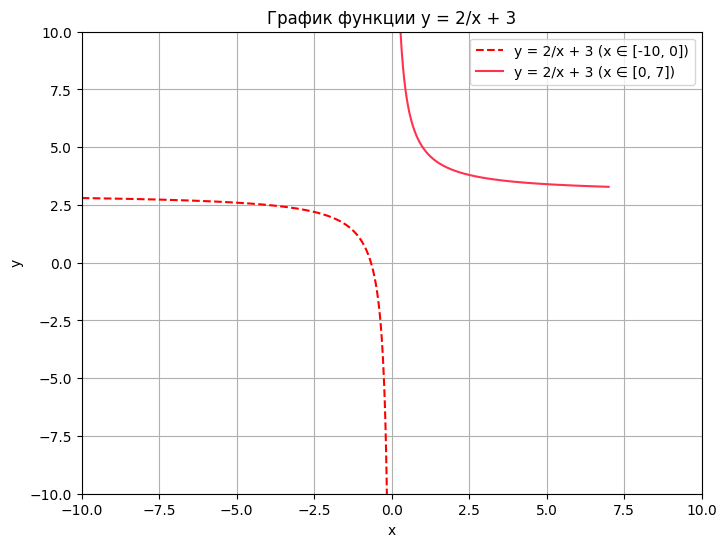

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Вывод версий используемых библиотек
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

# Определение функции
def func(x):
    return 2 / x + 3

# Диапазоны x
x1 = np.linspace(-10, -0.1, 500)  # Диапазон x от -10 до 0, избегаем деления на ноль
x2 = np.linspace(0.1, 7, 500)    # Диапазон x от 0 до 7, избегаем деления на ноль

# Построение графиков
plt.figure(figsize=(8, 6))
plt.plot(x1, func(x1), 'r--', label="y = 2/x + 3 (x ∈ [-10, 0])")  # Первый график (красный, штрихпунктирный)
plt.plot(x2, func(x2), color=(1.0, 0.2, 0.3), label="y = 2/x + 3 (x ∈ [0, 7])")  # Второй график (цвет (1.0, 0.2, 0.3), сплошной)

# Установка пределов осей
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Подписи к осям
plt.xlabel("x")
plt.ylabel("y")

# Заголовок
plt.title("График функции y = 2/x + 3")

# Легенда
plt.legend()

# Отображение сетки
plt.grid(True)

# Показ графика
plt.show()


### Задание 2. Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

### По оси X - возврат пассажира (Age)
### По оси Y - стоимость билета (Fare)
### Для выживших пассажиров используется маркер зеленый круг (Survived)
### Для не выживших пассажиров используется маркер красный крест (Survived)
### График должен подписи к осям и легенду и заголовок
### Данные для которых не указан возврат или стоимость билета должны быть исключены

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Numpy version: 1.26.4
Matplotlib version: 3.8.0
Пожалуйста, загрузите файл titanic.csv.


Saving titanic.csv to titanic.csv


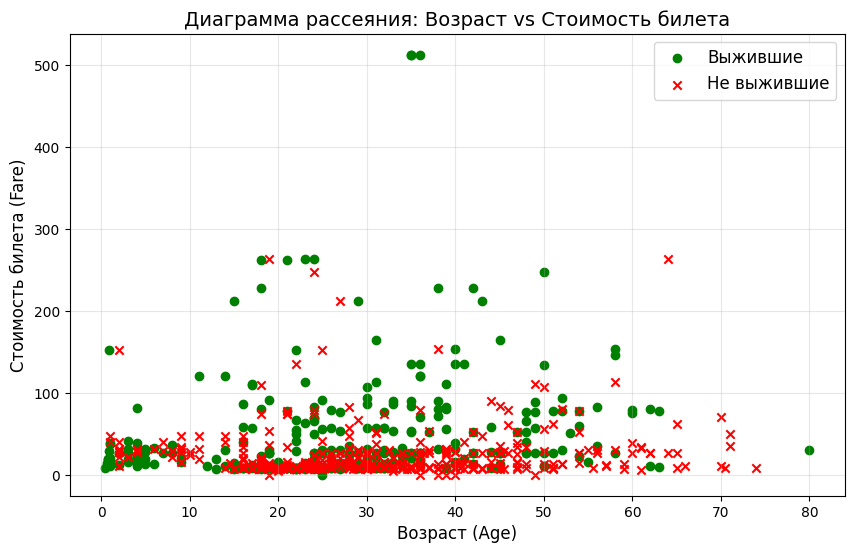

In [ ]:
# Импорт необходимых библиотек
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
import io

# Проверка версий библиотек
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

# Загрузка файла пользователем
print("Пожалуйста, загрузите файл titanic.csv.")
uploaded = files.upload()

# Чтение данных
file_name = list(uploaded.keys())[0]
data = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Удаление данных с отсутствующими значениями возраста (Age) или стоимости билета (Fare)
data = data.dropna(subset=['Age', 'Fare'])

# Разделение данных на выживших и погибших
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

# Построение графика
plt.figure(figsize=(10, 6))

# График для выживших
plt.scatter(survived['Age'], survived['Fare'], c='green', marker='o', label='Выжившие')

# График для невыживших
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', marker='x', label='Не выжившие')

# Настройка графика
plt.title('Диаграмма рассеяния: Возраст vs Стоимость билета', fontsize=14)
plt.xlabel('Возраст (Age)', fontsize=12)
plt.ylabel('Стоимость билета (Fare)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Отображение графика
plt.show()


### Задание 3. Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы. Для набора данных iris постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

### Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
### Цвет маркеров должен зависеть от вида ирисов (iris.target)
### Графики должны иметь подписи к осям, легенду и общий заголовок

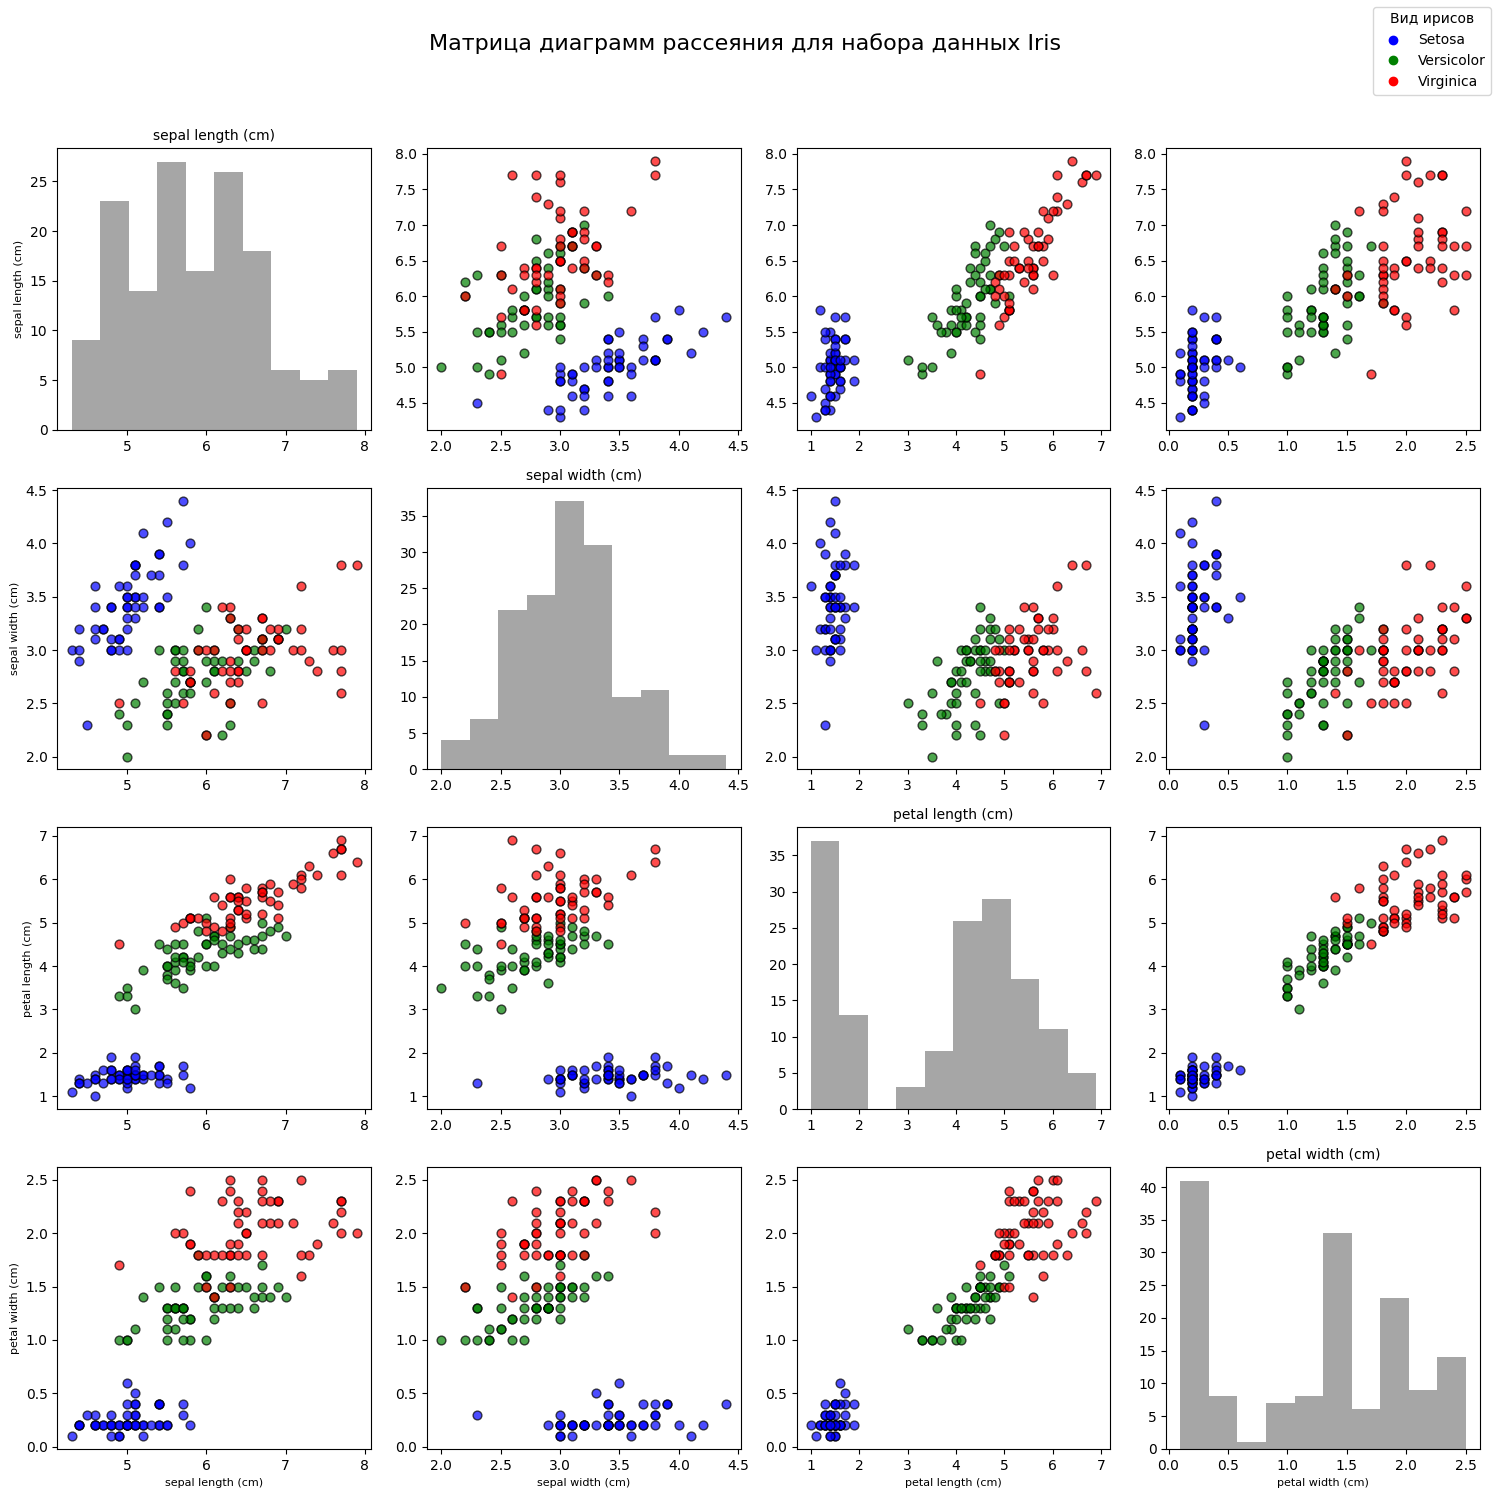

In [ ]:
# Импорт библиотек
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка набора данных Iris
iris = load_iris()

# Создание DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Сопоставление цветов для различных видов ирисов
species_color = {0: 'blue', 1: 'green', 2: 'red'}
iris_df['color'] = iris_df['species'].map(species_color)

# Названия видов ирисов для легенды
species_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Построение матрицы диаграмм рассеяния
features = iris.feature_names
num_features = len(features)
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15), sharex=False, sharey=False)

# Создание всех диаграмм
for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        if i == j:
            # Если диагональ, строим гистограммы
            ax.hist(iris_df[features[i]], color='gray', alpha=0.7)
            ax.set_title(features[i], fontsize=10)
        else:
            # Диаграммы рассеяния
            for species, color in species_color.items():
                subset = iris_df[iris_df['species'] == species]
                ax.scatter(
                    subset[features[j]],
                    subset[features[i]],
                    label=species_names[species] if j == 0 else None,
                    color=color,
                    alpha=0.7,
                    edgecolor='k',
                    s=40
                )
        # Подписи осей
        if i == num_features - 1:
            ax.set_xlabel(features[j], fontsize=8)
        if j == 0:
            ax.set_ylabel(features[i], fontsize=8)

# Настройки общего оформления
plt.suptitle('Матрица диаграмм рассеяния для набора данных Iris', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Легенда
handles = [plt.Line2D([], [], marker='o', color=color, linestyle='', label=name, markersize=6)
           for name, color in zip(species_names.values(), species_color.values())]
fig.legend(handles=handles, loc='upper right', title="Вид ирисов", fontsize=10)

# Отображение графика
plt.show()


### Задание 4. Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

### Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
### Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
### График должен иметь подписи к осям, легенду и заголовок
### Данные для которых не указан возраст или стоимость билета должны быть исключены

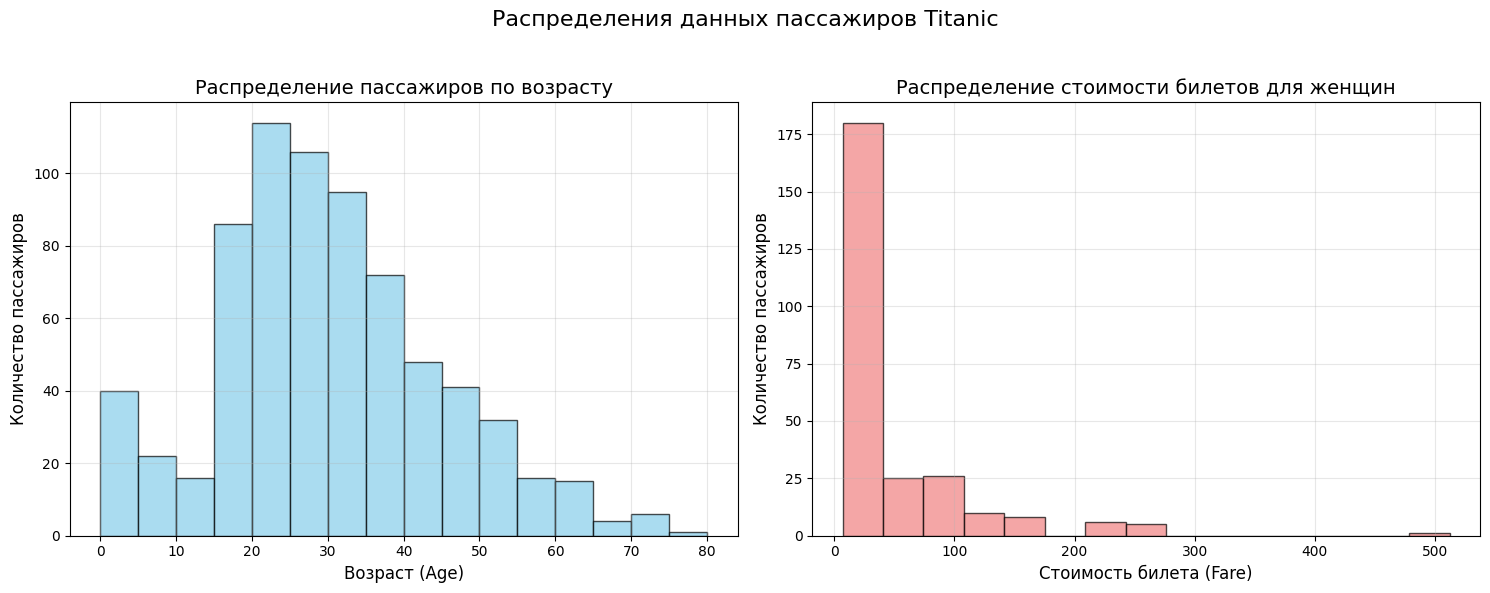

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import io

# Укажите путь к файлу titanic.csv
file_path = 'titanic.csv'  # Замените путь на актуальный для вашей системы

# Чтение данных
data = pd.read_csv(file_path)

# Удаление данных с отсутствующими значениями возраста и стоимости билетов
data = data.dropna(subset=['Age', 'Fare'])

# Фильтрация данных для женщин
female_data = data[data['Sex'] == 'female']

# Создание графика
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма распределения по возрасту
axes[0].hist(data['Age'], bins=range(0, int(data['Age'].max()) + 5, 5), color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение пассажиров по возрасту', fontsize=14)
axes[0].set_xlabel('Возраст (Age)', fontsize=12)
axes[0].set_ylabel('Количество пассажиров', fontsize=12)
axes[0].grid(alpha=0.3)

# Гистограмма распределения по стоимости билетов для женщин
axes[1].hist(female_data['Fare'], bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Распределение стоимости билетов для женщин', fontsize=14)
axes[1].set_xlabel('Стоимость билета (Fare)', fontsize=12)
axes[1].set_ylabel('Количество пассажиров', fontsize=12)
axes[1].grid(alpha=0.3)

# Общая настройка графиков
plt.suptitle('Распределения данных пассажиров Titanic', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Отображение графика
plt.show()


### Задание 5. Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

### Диаграмма должна быть вертикальной
### По оси X - класс каюты пассажира (Pclass)
### По оси Y - средняя стоимость за проезд для данного класса (Fare)
### График должен иметь подписи к осям, легенду и заголовок

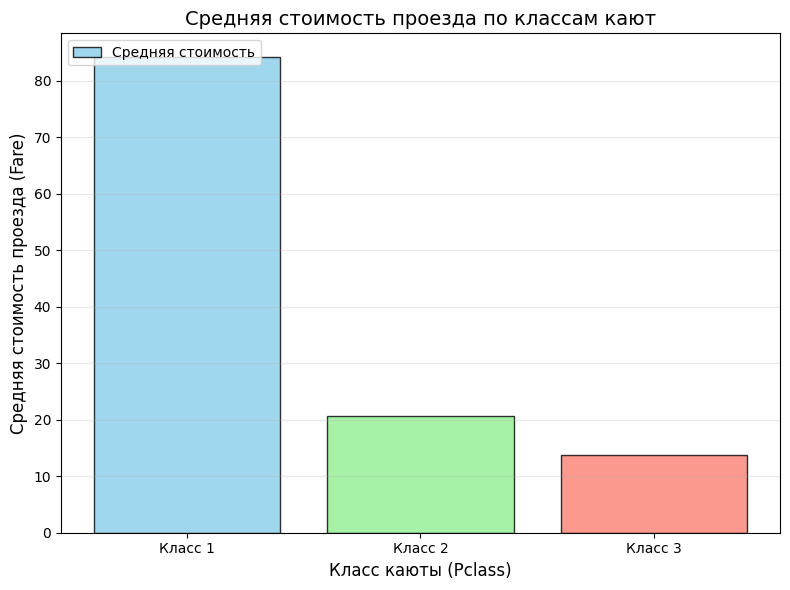

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import io

# Укажите путь к файлу titanic.csv
file_path = 'titanic.csv'  # Замените путь на актуальный для вашей системы

# Чтение данных
data = pd.read_csv(file_path)

# Удаление данных с отсутствующими значениями стоимости билетов
data = data.dropna(subset=['Fare', 'Pclass'])

# Вычисление средней стоимости проезда для каждого класса
avg_fare_by_class = data.groupby('Pclass')['Fare'].mean()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
plt.bar(avg_fare_by_class.index, avg_fare_by_class.values, color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black', alpha=0.8)

# Настройка графика
plt.title('Средняя стоимость проезда по классам кают', fontsize=14)
plt.xlabel('Класс каюты (Pclass)', fontsize=12)
plt.ylabel('Средняя стоимость проезда (Fare)', fontsize=12)
plt.xticks(avg_fare_by_class.index, labels=[f'Класс {int(x)}' for x in avg_fare_by_class.index], fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Легенда
plt.legend(['Средняя стоимость'], loc='upper left', fontsize=10)

# Отображение графика
plt.tight_layout()
plt.show()


### Задание 6. Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

### Диаграмма должна быть вертикальной
### По оси X - класс каюты пассажира (Pclass)
### По оси Y - количество пассажиров с разбивкой по полу (Sex)
### График должен иметь подписи к осям, легенду и заголовок

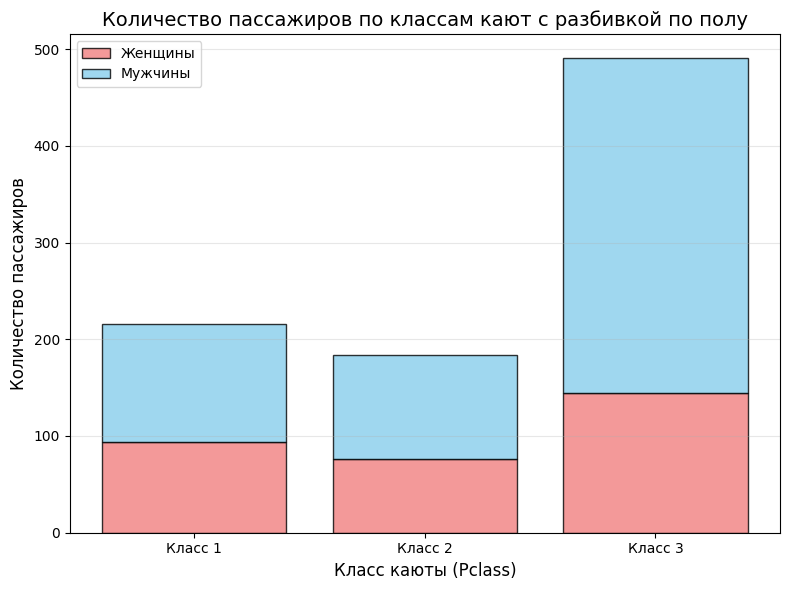

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import io

# Укажите путь к файлу titanic.csv
file_path = 'titanic.csv'  # Замените путь на актуальный для вашей системы

# Чтение данных
data = pd.read_csv(file_path)

# Удаление строк с отсутствующими значениями в Pclass или Sex
data = data.dropna(subset=['Pclass', 'Sex'])

# Подсчёт количества пассажиров по классу и полу
passenger_counts = data.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

# Построение столбчатой диаграммы с накоплением
plt.figure(figsize=(8, 6))

# Группы данных
x = passenger_counts.index
male_counts = passenger_counts['male']
female_counts = passenger_counts['female']

# Добавление данных на график
plt.bar(x, female_counts, color='lightcoral', label='Женщины', edgecolor='black', alpha=0.8)
plt.bar(x, male_counts, bottom=female_counts, color='skyblue', label='Мужчины', edgecolor='black', alpha=0.8)

# Настройка графика
plt.title('Количество пассажиров по классам кают с разбивкой по полу', fontsize=14)
plt.xlabel('Класс каюты (Pclass)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.xticks(x, labels=[f'Класс {int(i)}' for i in x], fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Отображение графика
plt.tight_layout()
plt.show()


## Задание 7. Для набора данных iris постройте круговую диаграмму

### Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
### Сектор с максимальной долей долен быть выдвинут
### График должен иметь подписи к осям, легенду и заголовок

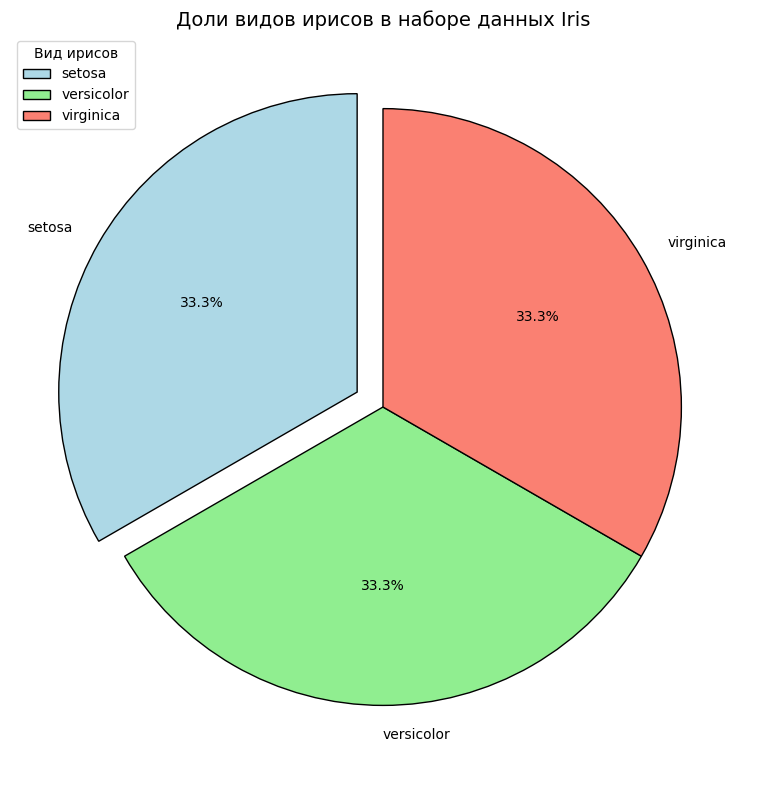

In [ ]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка данных iris
iris = load_iris()

# Создание DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Подсчёт количества ирисов каждого вида
species_counts = iris_df['species'].value_counts()
species_labels = [iris.target_names[i] for i in species_counts.index]

# Определение сектора с максимальной долей
explode = [0.1 if i == species_counts.idxmax() else 0 for i in species_counts.index]

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    species_counts,
    labels=species_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen', 'salmon'],
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)

# Добавление заголовка
plt.title('Доли видов ирисов в наборе данных Iris', fontsize=14)

# Легенда
plt.legend(title='Вид ирисов', labels=species_labels, loc='upper left', fontsize=10)

# Отображение графика
plt.tight_layout()
plt.show()


### Задание 8. Использую библиотеку Seaborn постройте гистограмму для возраста пассажиров "Титаника"

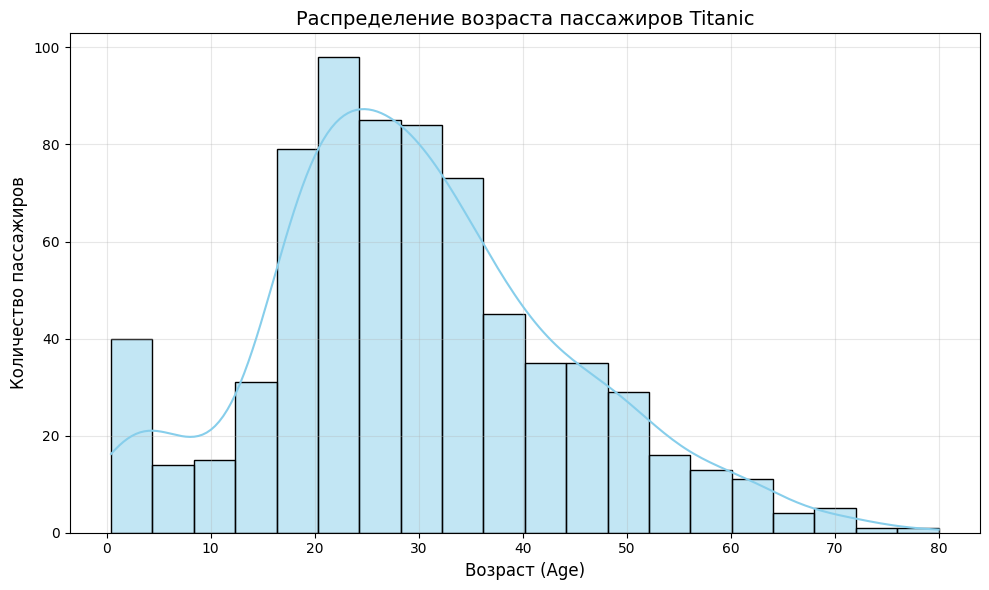

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Укажите путь к файлу titanic.csv
file_path = 'titanic.csv'  # Замените путь на актуальный для вашей системы

# Чтение данных
data = pd.read_csv(file_path)

# Удаление данных с отсутствующим возрастом
data = data.dropna(subset=['Age'])

# Построение гистограммы с использованием Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Настройка графика
plt.title('Распределение возраста пассажиров Titanic', fontsize=14)
plt.xlabel('Возраст (Age)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.grid(alpha=0.3)

# Отображение графика
plt.tight_layout()
plt.show()
